Classification of Handwritten digits images that represent single digit

In [34]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

MNIST

In [35]:
from keras.datasets import mnist

In [36]:
(X_train, y_train),(X_test,y_test) = mnist.load_data('D:/git/DeepLearning/CNN/dataset/mnist.npz')

In [37]:
X_train.shape

(60000, 28, 28)

In [38]:
X_test.shape

(10000, 28, 28)

In [39]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

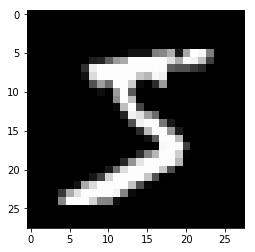

In [40]:
plt.imshow(X_train[0],cmap='gray')

In [41]:
#reshape to get 2d object array
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

In [42]:
X_train.shape

(60000, 784)

In [43]:
#converting values 0 to 255 to b/e 0 to 1 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [44]:
X_train[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [45]:
from keras.utils.np_utils import to_categorical

In [46]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [47]:
y_train[0]

5

In [48]:
# value 1 for the digit 5. others are 0
y_train_cat[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [49]:
#10 categories from digit 0-9
y_train_cat.shape

(60000, 10)

In [50]:
y_test_cat.shape

(10000, 10)

Fully connected model to classify images

Final architecture: cnn
![title](img/cnn.jpg)

In [51]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

K.clear_session()

model = Sequential()
model.add(Dense(512,input_dim =28*28,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [52]:
h = model.fit(X_train,y_train_cat,batch_size=128,epochs=10,verbose=1,validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 15s 368us/step - loss: 0.3336 - acc: 0.8971 - val_loss: 0.1913 - val_acc: 0.9439
Epoch 2/10
42000/42000 [==============================] - 11s 253us/step - loss: 0.1118 - acc: 0.9661 - val_loss: 0.1149 - val_acc: 0.9673
Epoch 3/10
42000/42000 [==============================] - 11s 258us/step - loss: 0.0699 - acc: 0.9786 - val_loss: 0.1113 - val_acc: 0.9693
Epoch 4/10
42000/42000 [==============================] - 11s 253us/step - loss: 0.0522 - acc: 0.9844 - val_loss: 0.1070 - val_acc: 0.9729
Epoch 5/10
42000/42000 [==============================] - 10s 246us/step - loss: 0.0403 - acc: 0.9879 - val_loss: 0.1328 - val_acc: 0.9627
Epoch 6/10
42000/42000 [==============================] - 11s 262us/step - loss: 0.0298 - acc: 0.9911 - val_loss: 0.1088 - val_acc: 0.9748
Epoch 7/10
42000/42000 [==============================] - 11s 273us/step - loss: 0.0252 - acc: 0.9922 - val_loss: 0.

Text(0.5,0,'Epochs')

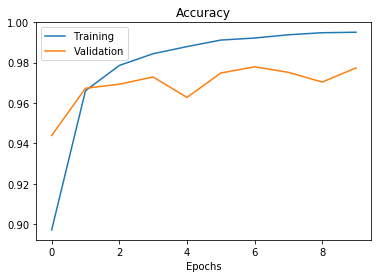

In [53]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training','Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')
#overfitting since train accuracy > validation accuracy

In [54]:
test_accuracy = model.evaluate(X_test,y_test_cat)[1]
test_accuracy

10000/10000 [==============================] - 1s 122us/step


0.98009999999999997

In [55]:
X_train.shape

(60000, 784)

In [56]:
#reshape 4 order tensor
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [57]:
X_train.shape

(60000, 28, 28, 1)

In [58]:
from keras.layers import Flatten, Activation

In [62]:
from keras.layers import Conv2D
from keras.layers import MaxPool2D, AvgPool2D

K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [63]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train_cat, batch_size=128,
          epochs=2, verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/2
10880/42000 [======>.......................] - ETA: 46s - loss: 0.5699 - acc: 0.8250

In [ ]:
model.evaluate(X_test, y_test_cat)